In [1]:
import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 

In [2]:
df_us = df[df['job_country'] == 'United States'].copy().dropna(subset= 'salary_year_avg')

In [3]:
df_us['job_title_short'].value_counts().head(6).index

job_titles = list(df_us['job_title_short'].value_counts().head(6).index)

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_us_6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [12]:
role_order = df_us_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

role_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

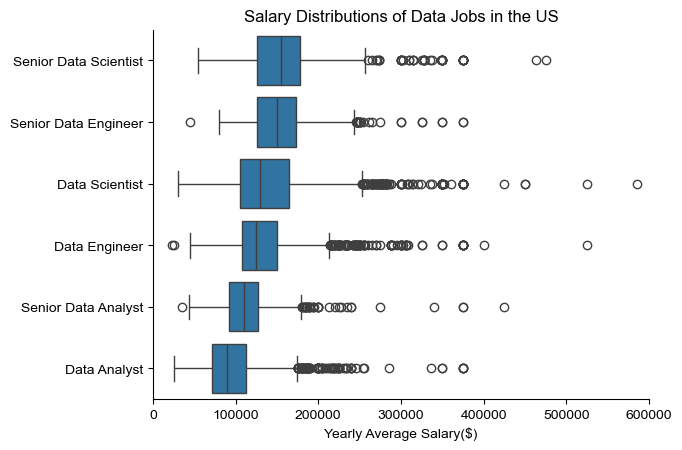

In [6]:
sns.boxplot(data=df_us_6, x='salary_year_avg', y='job_title_short', order= role_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Average Salary($)')
plt.ylabel('')
plt.xlim(0, 600000) 
plt.show()

In [7]:
## MEDIAN SALARY AGAINST TOP IN-DEMAND SKILLS FOR DATA ANALYSTS 

import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 

In [8]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_us = df_us.dropna(subset = 'salary_year_avg')

df_us = df.explode('job_skills')

df_us['job_skills']

df_us_grp = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_us_grp

,count,median
job_skills,,
airflow,1497,147090.5
airtable,22,102500.0
alteryx,386,115000.0
angular,113,130000.0
angular.js,2,127050.0
...,...,...
wrike,2,101250.0
wsl,0,NaN
xamarin,2,121250.0


In [9]:
df_us_grp_pay = df_us_grp.sort_values(by= 'median', ascending= False).head(10)


df_us_grp_pay

,count,median
job_skills,,
debian,1,196500.0
ringcentral,2,182500.0
mongo,256,173500.0
lua,1,170500.0
watson,31,157500.0
dplyr,19,157500.0
haskell,3,157500.0
hugging face,37,157500.0
asp.net core,1,155000.0


In [10]:
df_us_grp_skills = df_us_grp.sort_values(by= 'count', ascending= False).head(10)

df_us_grp_skills = df_us_grp_skills.sort_values(by= 'median', ascending= False)

df_us_grp_skills

,count,median
job_skills,,
spark,4016,140000.0
aws,4949,135000.0
java,2756,134241.0
python,12869,125000.0
azure,3466,125000.0
sql,12951,120000.0
r,5088,119550.0
tableau,4814,111175.0
sas,3132,110000.0


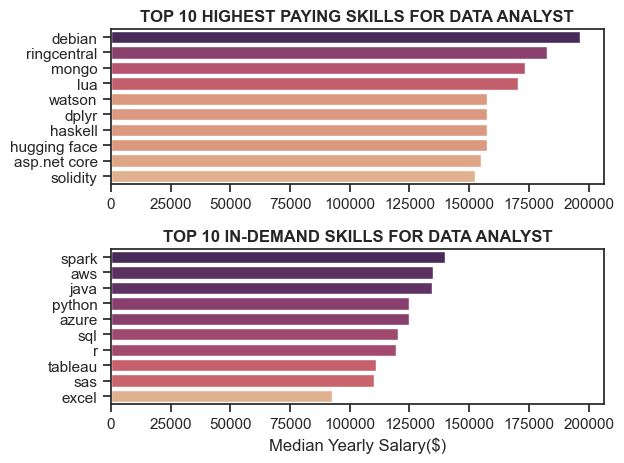

In [11]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style= 'ticks')

sns.barplot(data=df_us_grp_pay, x='median', y=df_us_grp_pay.index, ax=ax[0], hue= 'median', palette= 'flare')
ax[0].legend().remove()
#df_us_grp_pay[::-1].plot(kind= 'barh',y= 'median', ax=ax[0], legend= False)#[::-1] does the invert yaxis function, same as ax.[0]invert_yaxis() or plt.gca()
ax[0].set_title('TOP 10 HIGHEST PAYING SKILLS FOR DATA ANALYST', fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=df_us_grp_skills, x='median', y=df_us_grp_skills.index, ax=ax[1], hue= 'median', palette= 'flare')
ax[1].legend().remove()
#df_us_grp_skills[::-1].plot(kind= 'barh',y= 'median', ax=ax[1], legend= False)
ax[1].set_title('TOP 10 IN-DEMAND SKILLS FOR DATA ANALYST', fontweight='bold')
ax[1].set_xlim(ax[0].get_xlim())#get the x axis for both graphs to match
ax[1].set_xlabel('Median Yearly Salary($)')
ax[1].set_ylabel('')

fig.tight_layout()